### The mean-field induction equation

The mean-field induction equation is,
$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left[ \bar{\mathbf{V}} \times \bar{\mathbf{B}} + \mathcal{E} - \eta \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{\mathbf{B}} \right) - \eta_t \left( \nabla \times \bar{\mathbf{B}} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. 

We have to solve only in the z-direction, we remove all radial or azimuthal variations of the magnetic field $\left(\dfrac{\partial }{\partial r} = \dfrac{\partial }{\partial \phi} = 0 \right)$. 

We are now left with these simple PDE equations to solve,

Including the $\Omega$-effect term and the $\alpha$-effect term, we get,

$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2}  \qquad \qquad \text{and} \qquad \qquad  \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2}  $$

The dynamo number is given by,
$$ D = − \dfrac{\alpha_0 q \Omega_0 h^3}{\eta_t^2} $$

where $h$ is the thickness of the thin disk of the galaxy, $\alpha$ is the term responsible for the twisting of the toroidal fields into poloidal fields, $\Omega$ is the rotation rate fo the galaxy, causing the twisting of poloidal fields into toroidal fields, and $ q = -\dfrac{r}{\Omega} \dfrac{\partial \Omega}{\partial r} $.

-----

### Crank-Nicolson Method for Solving Second-Order PDE

The Crank-Nicolson method is a numerical technique used to solve second-order partial differential equations (PDEs) with more stability and accuracy compared to other methods like the explicit method. It is particularly useful for solving parabolic PDEs, which have a time-dependent component.

Consider a second-order parabolic PDE in the form:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

where $u(x, t)$ is the unknown function, $x$ represents spatial coordinates, $t$ represents time, $\alpha$ is a constant, and $f(x, t)$ is a given function.

To discretize this PDE, we use finite differences.
Let $u_i^n$ represent the approximate solution at spatial position $x_i$ and time $t_n$. 
We can approximate the spatial derivatives using central differences, and the time derivative using either forward or backward differences. 
The Crank-Nicolson method takes a midpoint between these two.

The Crank-Nicolson scheme for the above PDE can be written as:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = \frac{\alpha}{2} \left( \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{\Delta x^2} + \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2} \right) 
$$

Rearranging terms, we get:

$$
-\frac{\alpha \Delta t}{2\Delta x^2}u_{i-1}^{n+1} + \left(1 + \frac{\alpha \Delta t}{\Delta x^2}\right)u_i^{n+1} - \frac{\alpha \Delta t}{2\Delta x^2}u_{i+1}^{n+1} = \frac{\alpha \Delta t}{2\Delta x^2}u_{i-1}^n + \left(1 - \frac{\alpha \Delta t}{\Delta x^2}\right)u_i^n + \frac{\alpha \Delta t}{2\Delta x^2}u_{i+1}^n 
$$

This equation can be represented in matrix form:

$$
AU^{n+1} = BU^n
$$

where $A$ and $B$ are tridiagonal matrices representing the coefficients of $u^{n+1}$ and $u^n$ respectively, and $F$ represents the forcing function evaluated at each spatial point.

To solve for $U^{n+1}$, we can rearrange the equation and apply a suitable linear solver.



#### Crank Nicolson Method (modified for Coupled case)

For the above equations we can write

$$
\frac{U_{i,j} - U_{i,j-1}}{\Delta t} = -\alpha(z) \frac{V_{i,j-1} - V_{i-1,j-1}}{\Delta z} + \frac{\eta_T}{2\Delta z^2} \left[ (U_{i-1,j-1} + U_{i+1,j-1} - 2U_{i,j-1}) + (U_{i-1,j} + U_{i+1,j} - 2U_{i,j}) \right]
$$

$$
\frac{V_{i,j} - V_{i,j-1}}{\Delta t} = -q\Omega U_{i,j} + \frac{\eta_T}{2\Delta z^2} \left[ (V_{i-1,j-1} + V_{i+1,j-1} - 2V_{i,j-1}) + (V_{i-1,j} + V_{i+1,j} - 2V_{i,j}) \right]
$$

rearranging the terms:

$$
U_{i,j} \left(\frac{1}{\Delta t} + \frac{\eta_T}{2\Delta z^2}\right) - (U_{i-1,j} + U_{i+1,j}) \frac{\eta_T}{2\Delta z^2} = U_{i,j-1} \left(\frac{1}{\Delta t} - \frac{1}{\Delta z^2}\right) - \alpha(z) \frac{V_{i,j-1} - V_{i-1,j-1}}{\Delta z} + \frac{\eta_T}{2\Delta z^2} (U_{i-1,j-1} + U_{i+1,j-1})
$$
$$
V_{i,j} \left(\frac{1}{\Delta t} + \frac{\eta_T}{2\Delta z^2}\right) - (V_{i-1,j} + V_{i+1,j}) \frac{\eta_T}{2\Delta z^2} = V_{i,j-1} \left(\frac{1}{\Delta t} - \frac{1}{\Delta z^2}\right) - q\Omega U_{i,j} + \frac{\eta_T}{2\Delta z^2} (V_{i-1,j-1} + V_{i+1,j-1})
$$

We can transform these into set of linear equations and solve them.

----

### Initial Conditions of $B_{r}$ and $B_{\phi}$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# Defining Grid and Initial Conditions
T = 15
dT = 0.075
NT = int(T/dT)
L = 2
dL = 0.01
NL = int(L/dL)
U = np.zeros((NT+1, NL+1))  # Initialize U matrix
V = np.zeros((NT+1, NL+1))  # Initialize V matrix

x = np.linspace(-1, 1, NL+1)

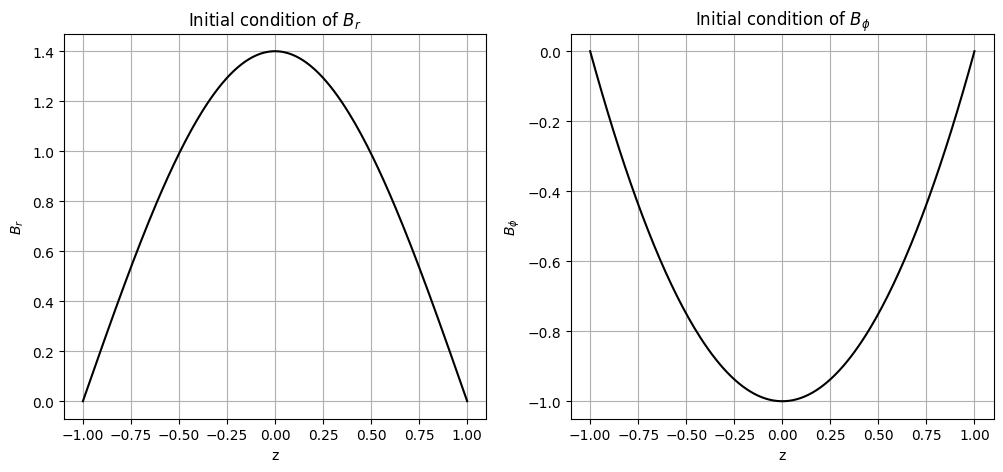

In [3]:
# Initial conditins of the magnetic fields 

z = np.linspace(-1, 1, NL)
Br = 1.4*np.abs(np.cos(0.5*np.pi*z))
Bphi = -(1-z**2)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(z,Br,color='black')
ax[1].plot(z,Bphi,color='black')
ax[0].set_title("Initial condition of $B_{r}$")
ax[1].set_title("Initial condition of $B_{\phi}$")
ax[0].set_xlabel('z')
ax[0].set_ylabel('$B_{r}$')
ax[1].set_xlabel('z')
ax[1].set_ylabel('$B_{\phi}$')
ax[0].grid()
ax[1].grid()

In [4]:
from copy import deepcopy as copy
def solve(U, V, dt, dx, alpha0, omega, q, eta, verbose = True):
    
    U = -copy(U)  # copy to avoid changing the original
    V = copy(V)  # copy to avoid changing the original

    a = 1/dt + eta/(dx**2)
    b = eta/(2*dx**2)


    A = np.zeros((U.shape[1]-2, U.shape[1]-2))
    for row in range(A.shape[0]):
        A[row, row] = a
        if row > 0:
            A[row, row-1] = -b
        if row < A.shape[0]-1:
            A[row, row+1] = -b

    A_inv = np.linalg.inv(A)
    
    z = np.linspace(-1, 1, U.shape[1]-1)
    # alpha = -alpha0 if z < 0, 0 if z = 0, +alpha0 if z>0
    

    for j in range(1, U.shape[0]):  
        # make B for U
        BU = np.zeros(U.shape[1]-2)
        
        for i, zi in enumerate(z):
            BU[i-1] = U[j-1, i]*(1/dt - eta/dx**2) - alpha0*np.sign(zi)*(V[j-1, i] - V[j-1, i-1])/dx + b*(U[j-1, i-1] + U[j-1, i+1])
        # solve for U
        U[j, 1:-1] = A_inv @ BU

        BV = np.zeros(V.shape[1]-2)
        
        for i in range(1, V.shape[1]-1):
            BV[i-1] = V[j-1, i]*(1/dt - eta/dx**2) - 0.5*omega*q*U[j, i] + b*(V[j-1, i-1] + V[j-1, i+1])
        # solve for V
        V[j, 1:-1] = A_inv @ BV.T
    
    return -U, V

### Growing Dynamo

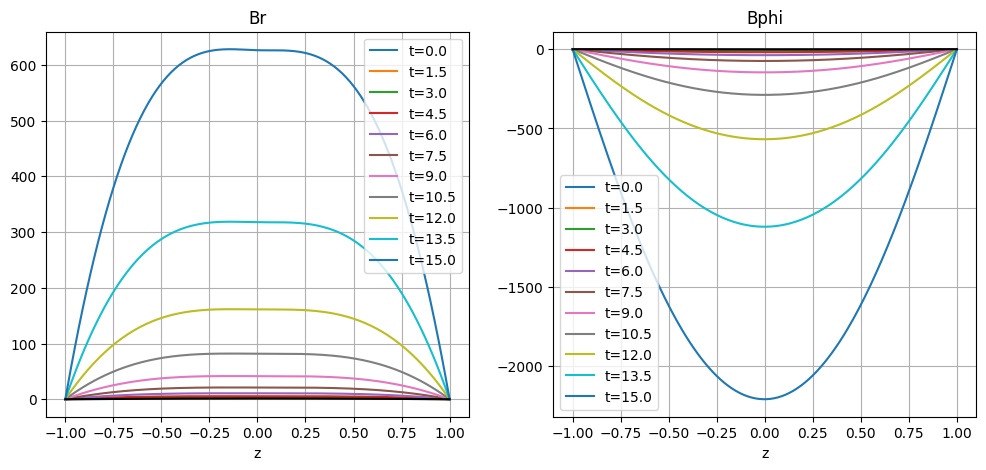

In [5]:
# Defining Grid and Initial Conditions
T = 15
dT = 0.075
NT = int(T/dT)
L = 2
dL = 0.01
NL = int(L/dL)
U = np.zeros((NT+1, NL+1))  # Initialize U matrix
V = np.zeros((NT+1, NL+1))  # Initialize V matrix
alpha = 1
eta = 1
q = 0.9
omega = 20


x = np.linspace(-1, 1, NL+1)
U[0,:] = 1.4*np.abs(np.cos(0.5*np.pi*x))
V[0,:] = -1*np.cos(0.5*np.pi*x)

U, V = solve(U, V, dT, dL, alpha, omega, q, eta)

# plot U and V at each time steps (every 50th time step)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i in range(0, NT+1, 20):
    ax[0].plot(x,U[i, :], label=f"t={i*dT}")
    ax[1].plot(x,V[i, :], label=f"t={i*dT}")
ax[0].set_title("Br")
ax[1].set_title("Bphi")
ax[0].legend()
ax[1].legend()
ax[0].plot(x,U[0, :], label=f"initial condition",color='black')
ax[1].plot(x,V[0, :], label=f"initial condition",color='black')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
plt.show()

In [6]:
alpha = 1
eta = 1
q = 0.9
omega = 20
# calculating the dynamo number
D = -alpha*q*omega/eta**2
print('The value of Dynamo number is :',D)

The value of Dynamo number is : -18.0


In [ ]:
# Function to animate plots
def animate(i):
    plt.clf()

    plt.subplot(1, 2, 1)
    plt.plot(x, U[i, :],color='blue')
    plt.title('Time Step: {}'.format(i))
    plt.xlabel('z')
    plt.ylabel('Magnetic Field $B_r$')
    plt.grid()
    # plt.ylim(0, 150)

    plt.subplot(1, 2, 2)
    plt.plot(x, V[i, :],color='green')
    plt.title('Time Step: {}'.format(i))
    plt.xlabel('z')
    plt.ylabel('Magnetic Field $B_{\phi}$')
    plt.grid()
    # plt.ylim(-500, 0)

# Create animation
fig = plt.figure(figsize=(14, 5))
ani2 = FuncAnimation(fig, animate, frames=200, interval=50)

ani2.save('ani_growing.gif', writer='ffmpeg')

<img src='ani_growing.gif' width='1200' height='400' />

Best-fit line : m = 0.452649 and c = 0.948753


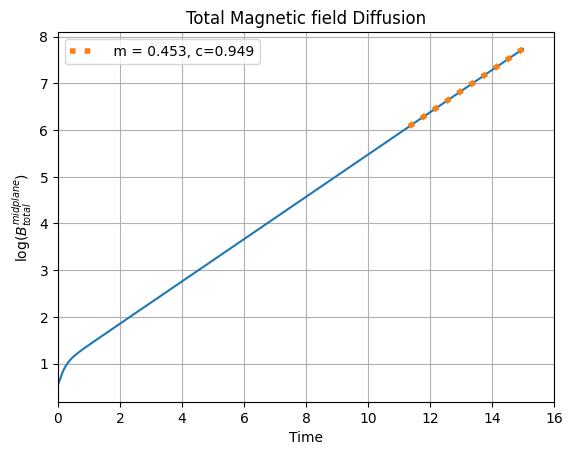

In [82]:
## Total magnetic field 
total_B = np.sqrt(U**2+V**2)
t = np.linspace(0, T, NT+1)

plt.plot(t,np.log(total_B[:,100]))

m, c =  np.polyfit(t[-50:],np.log(total_B[-50:,100]),1)
print(f'Best-fit line : m = {m:.6f} and c = {c:6f}')
plt.plot(t[-50:], m*t[-50:] + c, ':', linewidth=4,label=f' m = {m:.3f}, c={c:.3f}')

plt.title('Total Magnetic field Diffusion')
plt.xlabel('Time')
plt.ylabel('log$(B^{midplane}_{total})$')
plt.legend()
plt.grid(True)
plt.xlim(0,16)
plt.show()

### Decaying Dynamo

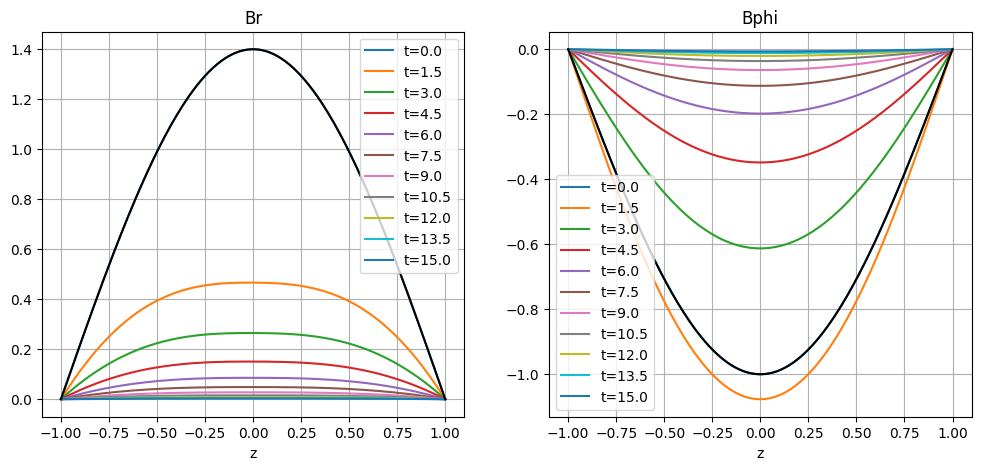

In [83]:
# Defining Grid and Initial Conditions
T = 15
dT = 0.075
NT = int(T/dT)
L = 2
dL = 0.01
NL = int(L/dL)
U = np.zeros((NT+1, NL+1))  # Initialize U matrix
V = np.zeros((NT+1, NL+1))  # Initialize V matrix
alpha = 1
eta = 1
q = 0.9
omega = 10


x = np.linspace(-1, 1, NL+1)
U[0,:] = 1.4*np.abs(np.cos(0.5*np.pi*x))
V[0,:] = -1*np.cos(0.5*np.pi*x)

U, V = solve(U, V, dT, dL, alpha, omega, q, eta)

# plot U and V at each time steps (every 50th time step)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i in range(0, NT+1, 20):
    ax[0].plot(x,U[i, :], label=f"t={i*dT}")
    ax[1].plot(x,V[i, :], label=f"t={i*dT}")
ax[0].set_title("Br")
ax[1].set_title("Bphi")
ax[0].legend()
ax[1].legend()
ax[0].plot(x,U[0, :], label=f"initial condition",color='black')
ax[1].plot(x,V[0, :], label=f"initial condition",color='black')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')

plt.show()

In [101]:
alpha = 1
eta = 1
q = 0.9
omega = 10
# calculating the dynamo number
D = -alpha*q*omega/eta**2
print('The value of Dynamo number is :',D)

The value of Dynamo number is : -9.0


In [ ]:
# Function to animate plots
def animate(i):
    plt.clf()

    plt.subplot(1, 2, 1)
    plt.plot(x, U[i, :],color='blue')
    plt.title('Time Step: {}'.format(i))
    plt.xlabel('z')
    plt.ylabel('Magnetic Field $B_r$')
    plt.grid()
    plt.ylim(-1.5, 1.5)

    plt.subplot(1, 2, 2)
    plt.plot(x, V[i, :],color='green')
    plt.title('Time Step: {}'.format(i))
    plt.xlabel('z')
    plt.ylabel('Magnetic Field $B_{\phi}$')
    plt.grid()
    plt.ylim(-1.5, 1.5)

# Create animation
fig = plt.figure(figsize=(14, 5))
ani2 = FuncAnimation(fig, animate, frames=150, interval=100)

ani2.save('ani_decaying.gif', writer='ffmpeg')

<img src='ani_decaying.gif' width='1200' height='400' />

Best-fit line : m = -0.376417 and c = 0.725115


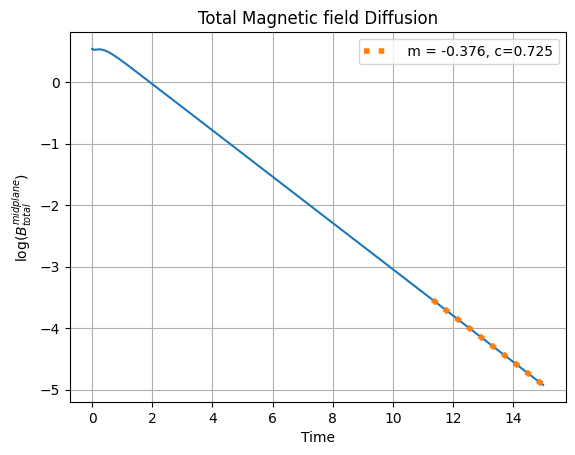

In [86]:
## Total magnetic field 
total_B = np.sqrt(U**2+V**2)

plt.plot(t,np.log(total_B[:,100]))

m, c =  np.polyfit(t[-50:],np.log(total_B[-50:,100]),1)
print(f'Best-fit line : m = {m:.6f} and c = {c:6f}')
plt.plot(t[-50:], m*t[-50:] + c, ':', linewidth=4,label=f' m = {m:.3f}, c={c:.3f}')

plt.title('Total Magnetic field Diffusion')
plt.xlabel('Time')
plt.ylabel('log$(B^{midplane}_{total})$')
plt.legend()
plt.grid(True)

#### Critical Dynamo Number

In [ ]:
omega_arr = np.linspace(10, 20, 1000)
slopes = []
for i in range(len(omega_arr)):
    omega = omega_arr[i]
    U = np.zeros((NT+1, NL+1))  # Initialize U matrix
    V = np.zeros((NT+1, NL+1))  # Initialize V matrix
    U[0,:] = 1.4*np.abs(np.cos(0.5*np.pi*x))
    V[0,:] = -1*np.cos(0.5*np.pi*x)
    U, V = solve(U, V, dT, dL, alpha, omega, q, eta, verbose=False)
    total_B = np.sqrt(U**2+V**2)
    m, c =  np.polyfit(t[-50:],np.log(total_B[-50:,100]),1)
    slopes.append(m)


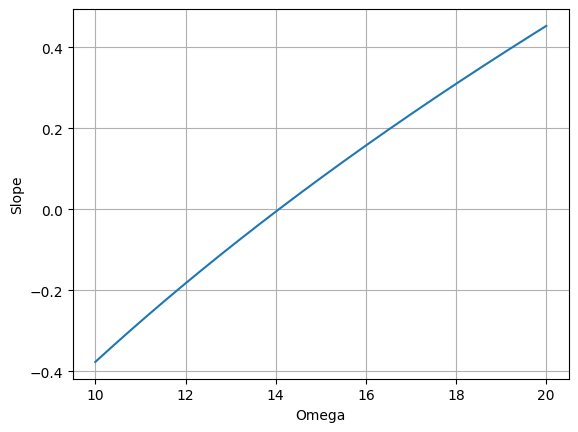

In [91]:
plt.plot(omega_arr, slopes)
plt.xlabel('Omega')
plt.ylabel('Slope')
plt.grid()

In [94]:
from scipy.optimize import fsolve
def f(x):
    return np.interp(x, omega_arr, slopes)
omega_zero = fsolve(f, 12)

In [97]:
omega = omega_zero[0]
U = np.zeros((NT+1, NL+1))  # Initialize U matrix
V = np.zeros((NT+1, NL+1))  # Initialize V matrix
U[0,:] = 1.4*np.abs(np.cos(0.5*np.pi*x))
V[0,:] = -1*np.cos(0.5*np.pi*x)
U, V = solve(U, V, dT, dL, alpha, omega, q, eta)

# calculating the dynamo number
D = -alpha*q*omega/eta**2
print(f'The value of Critical Dynamo number is : {D:.6f}')

total_B = np.sqrt(U**2+V**2)
m, c =  np.polyfit(t[-50:],np.log(total_B[-50:,100]),1)
print(f'Best-fit line : m = {m:.6f} and c = {c:.6f} for omega = {omega:.6f}')

The value of Critical Dynamo number is : -12.661283
Best-fit line : m = 0.000000 and c = 0.828002 for omega = 14.068092


Best-fit line : m = 0.000000 and c = 0.828002 for omega = 14.068091763378808


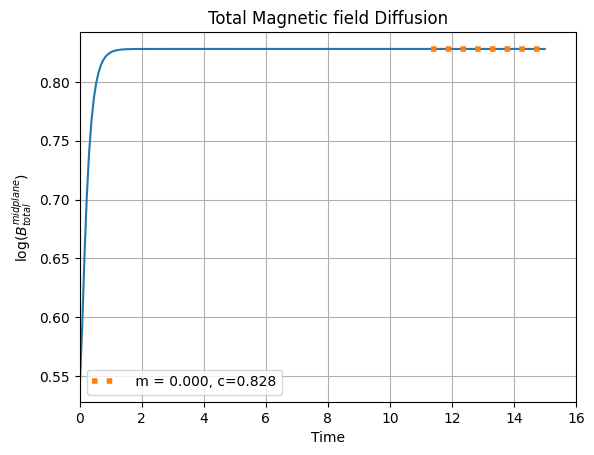

In [96]:

plt.plot(t,np.log(total_B[:,100]))
print(f'Best-fit line : m = {m:.6f} and c = {c:6f} for omega = {omega}')
plt.plot(t[-50:], m*t[-50:] + c, ':', linewidth=4,label=f' m = {m:.3f}, c={c:.3f}')
plt.title('Total Magnetic field Diffusion')
plt.xlabel('Time')
plt.ylabel('log$(B^{midplane}_{total})$')
plt.legend()
plt.grid(True)
plt.xlim(0,16)
plt.show()